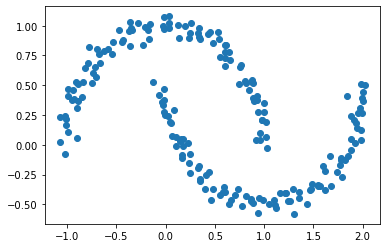

In [2]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)

plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

In [3]:
kmeans = KMeans(2, random_state=0)

In [4]:
labels = kmeans.fit(Xmoon).predict(Xmoon)

In [8]:
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(Xmoon)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(Xmoon[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

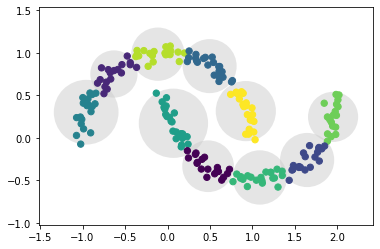

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
plot_kmeans(kmeans, Xmoon)

In [62]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(Xmoon)
distances, indices = nbrs.kneighbors(Xmoon)

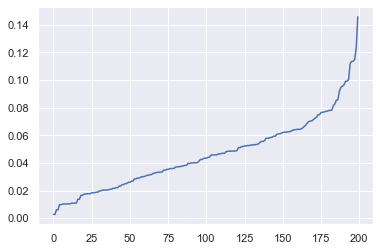

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [102]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.11, min_samples=2).fit(Xmoon)
clustering.labels_
fit_predict = clustering.fit_predict(Xmoon)

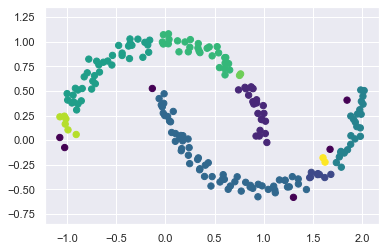

In [103]:
ax = None or plt.gca()
ax.axis('equal')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], c=fit_predict, s=40, cmap='viridis', zorder=2)